
# <center>Rock-Paper-Scissors


### Aim: 
>To Analayze/visualize image dataset and prepare it for Machines Learning Algorithms for Rock-Paper-Scizzer
### Objectives:		

The objective of this project is to build an ML-enabled game application of Rock-Paper-Scissors. You will need to explore and use a given dataset containing images of the hand gestures associated with rock, paper, and scissors game. You will use the dataset to design and train an ML model that is able to detect the gesture from a live camera feed and determine the winner in the game accordingly. 
    
    

  


## 1. Libraries Installation

In this Project, we will use OpenCV library to do preprocessing on the dataset. Run the following block to install the library on our machine.

In [1]:
!pip install opencv-python


Run the next block to verify the installation of tensorflow libraries on your machine.

In [2]:
import tensorflow as tf
import keras
print(tf.__version__)
!pip show keras
!pip show tensorflow

2024-04-01 16:36:15.536560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 16:36:15.536666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 16:36:15.680635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0
Name: keras
Version: 3.0.5
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, dm-tree, h5py, ml-dtypes, namex, numpy, rich
Required-by: keras-tuner, tensorflow
Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-decision-forests, tensorflow-serving-api, t

**(Optional)** If the code return an exception, it means you need to install the library. Run this block below to install it, then rerun the block above to verify.

In [3]:
# !pip install tensorflow[and-cuda]

## 2. Import Libraries

Next, we will import libraries that will be used in this tutorial.

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# # Ignore all warnings
warnings.filterwarnings("ignore")

## 3. Dataset Loading

In this step, we will load the dataset into the project. Make sure that you have the dataset in the same folder of this jupyter. The main directory of the dataset should be `input/rock-paper-scizer/rock_paper_scizer`. 

In [5]:


def load_data(dir, size):
    """
    this code iterate through each folder and then iterate through each image to read the 
    image corresponding to each categories and store image to an array. The label are also store in an array
    """
    print("Data loading started ...\n")
    # Sort directories inside the dataset directory alphabetically.
    uniq_labels = os.listdir(dir)
    # Data containers 
    images = []
    labels = []

    for path in uniq_labels:
        path1 = os.path.join(dir, path)
        label_name = os.path.basename(path1)

        for img_path in os.listdir(path1):
            img_path1 = os.path.join(path1, img_path)
            img = cv2.imread(img_path1)
            if img is None:
                continue
            img = cv2.resize(img, (size[0], size[1]))
            images.append(img)
            labels.append(label_name)

    # Convert the lists into numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    print("Data loading completed ...\n")
    # Return the containers.
    return images, labels



**Q1.3**: `load_data(directory, size)` function is responsible for loading the data from your local machine. Use hints (comments) written inside the function to explain procedures the function is doing to load the data. Write the procedures in detail below.

**A1.3:** **Answer HERE**

* The load_data function is responsible for loading the dataset from the local machine. It begins by initializing empty lists for images and labels. Then, it iterates through each label folder in the dataset, reading each image using OpenCV. If an image cannot be read, it skips it. Each image is resized to predefined dimensions and added to the images list, while the corresponding label indices are added to the labels list. Finally, the function converts the images list to a numpy array and returns both the arrays of images and labels for further processing.

Use `load_data` function to load the dataset and store the loaded images and labels in `images` and `labels` variables respectively. 

**Hint: All images should maintain size of 224x224**

In [6]:
image_size = (224, 224)

dataset_directory_train = '/kaggle/input/rock-paper-scizer/rock_paper_scizer/train'
dataset_directory_test = '/kaggle/input/rock-paper-scizer/rock_paper_scizer/test'

images_train, labels_train = load_data(dataset_directory_train, image_size)
images_test, labels_test = load_data(dataset_directory_test, image_size)
# Concatenate images and labels arrays
images_train= np.concatenate((images_train, images_test), axis=0)
labels_train = np.concatenate((labels_train, labels_test), axis=0)

Data loading started ...

Data loading completed ...

Data loading started ...

Data loading completed ...



## 4. Data Visualization

In this step, you will familarize yourself with the dataset you have loaded in the previous step.

***Write proper code that shows answer of the following questions.*

**Q4.1:** How many images do you have in the dataset? 

In [7]:
print("The num : ",len(images_train))

The num :  2188


In [8]:
images_train.shape

(2188, 224, 224, 3)

**Q4.2:** Display the label of the  data from the **beginning and end** alongside their images using `plt.imshow()` and `subplot()` functions. Make sure that you title the image by its label. 

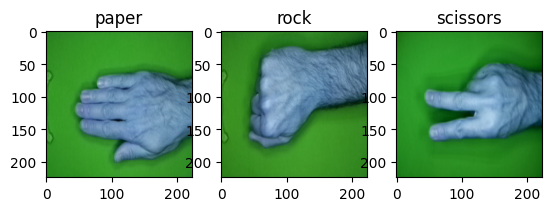

In [9]:
## Printing the Categories

plt.subplot(1,3,1)
plt.title(labels_train[4])
plt.imshow(images_train[4])
plt.subplot(1,3,2)
plt.title(labels_train[700])
plt.imshow(images_train[700])
plt.subplot(1,3,3)
plt.title(labels_train[1500])
plt.imshow(images_train[1500])

**Q4.3:** What is the shape of the images?

In [10]:
print('Images shape ', images_train.shape)

Images shape  (2188, 224, 224, 3)


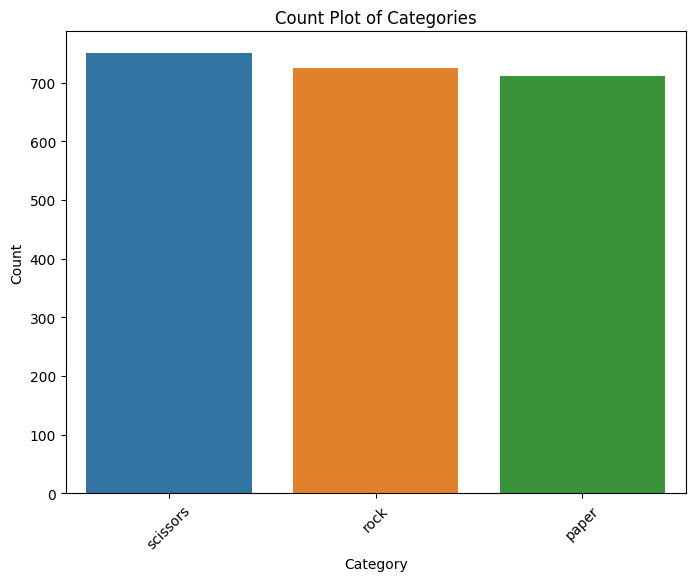

In [11]:
## Checking for imbalance data
import seaborn as sns
labels_series = pd.Series(labels_train)

# Count the occurrences of each category
category_counts = labels_series.value_counts()

# Plot the count of categories
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Count Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Q4.4**: Use `train_test_split` to split the images and labels into training and testing dataset. The test dataset should be 30% of the entire dataset.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.3)
y_train = np.array(y_train)
y_test = np.array(y_test)

Let's display some statistics about the countity of the examples per label of the training dataset using `Data_statistics` function.

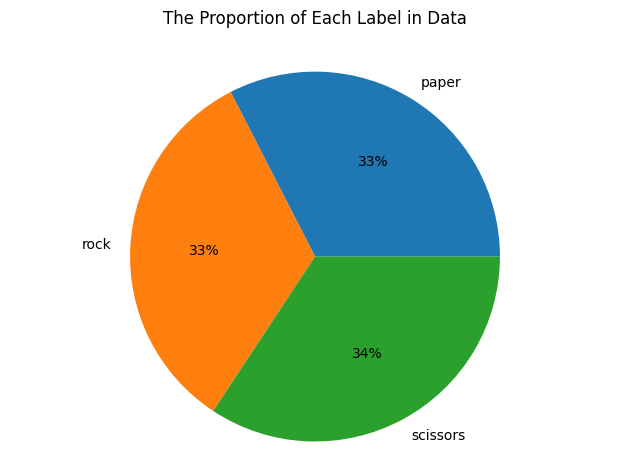

In [13]:
def Data_statistics(labels, class_names):
    counts = []
    for class_name in class_names:
        counts.append(np.sum(labels == class_name))

    # Pie chart
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=class_names, autopct='%0.0f%%')
    ax1.axis('equal')
    plt.title("The Proportion of Each Label in Data\n")
    plt.tight_layout()
    plt.show()

# Assuming you have loaded the labels into the 'labels' variable and have unique class names in 'unique_labels'
Data_statistics(labels_train, np.unique(labels_train))

**Q4.5:** Assume the data is not balanced, say class 0 has less images comparing to other classes, what is your strategy to overcome this issue?

* To address imbalanced data, strategies include data augmentation, class weighting, SMOTE for synthetic samples, data collection for underrepresented classes, fine-tuning pre-trained models, ensemble methods, class resampling, and custom loss functions. These approaches aim to balance class distributions, improving model performance and generalization.

Let's visualize part of the dataset.

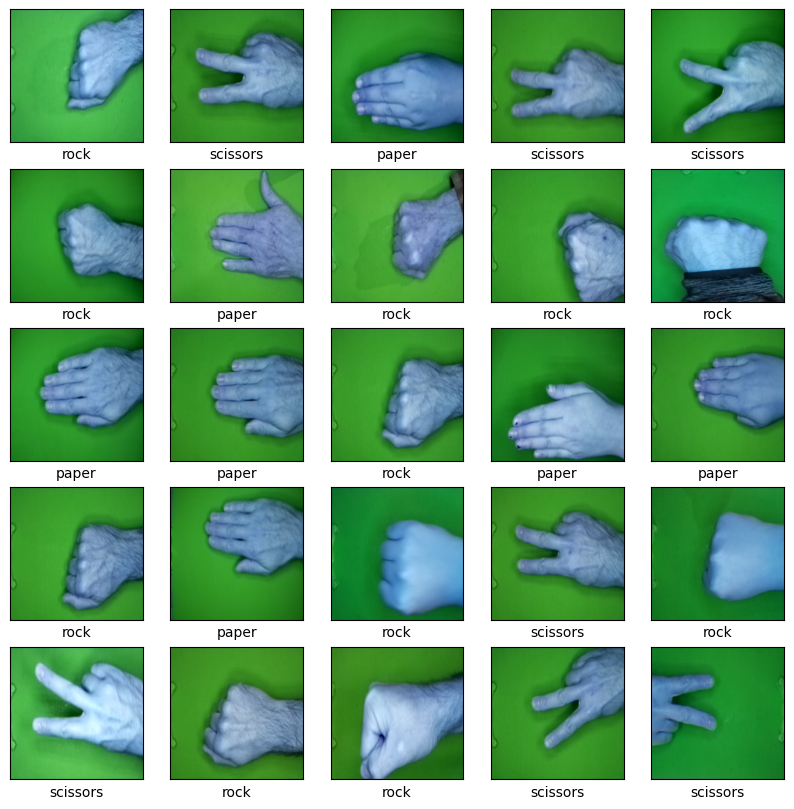

In [14]:
def Data_visualization(data_x, data_y,grid_size):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10,10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data_x[i])
        ax.set(xticks=[], yticks=[], xlabel = data_y[i])
    plt.show()
    
Data_visualization(x_train, y_train,grid_size = (5, 5))

## 5. Preprocessing

In this step, you will prepare the data for training.

In order to ensure the generaliztion of the model while training on the dataset, to not suffer from overfitting, we will generate variations of images exist in the dataset. These variations will be identical to the original image with some transformations, like rotation and flipping. 

In [15]:
def Data_Preprocessing(x_train,y_train, x_test, y_test, Batch_size):
    
    # Variation Generator (Data Augmentation)
    train_datagen = ImageDataGenerator(
        horizontal_flip=True,  # Horizontal flip
        vertical_flip=True,    # Vertical flip
        rotation_range = 20,
        shear_range=0.2,
        zoom_range=0.2,# Rotation 20 degrees (left or right)
        rescale = 1./255)      # Normalization of the pixels
    
    # Apply the transformation on the training dataset
    train_generator = train_datagen.flow(x_train, y_train, batch_size = Batch_size)
    
    # Variation Generator for testing data. Since testing data is just for evaluating the performance
    # , there is no need to apply data augmentation on the data. 
    test_datagen = ImageDataGenerator(rescale = 1./255)
    
    # Apply the transformation on the testing dataset
    test_generator = test_datagen.flow(x_test, y_test, batch_size = Batch_size, shuffle=False)
    
    
    return train_generator, test_generator

**Batching**: When you deal with huge dataset, the memory size may not fit to enter the data as bulk to the model. Thus, we could split the data into small batches that will be enter separately to the model.

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert class names to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert numerical labels to one-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


BATCH_SIZE = 64
train_gen, test_gen = Data_Preprocessing(x_train,y_train_categorical, x_test, y_test_categorical, Batch_size = BATCH_SIZE)

Now, let's visualize part of the batches after data augmentation.

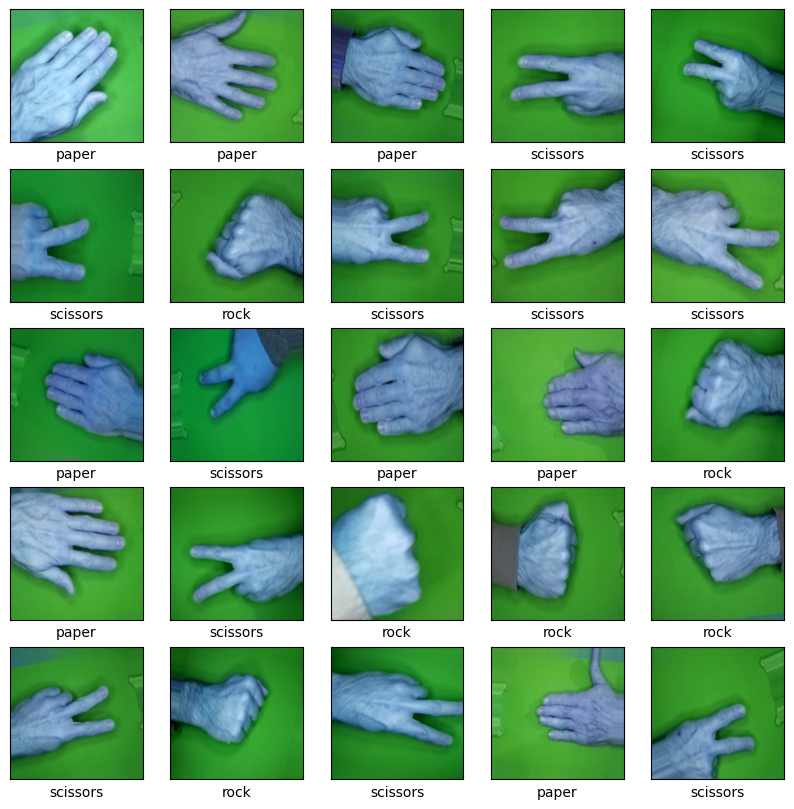

In [17]:
for batch in train_gen:
    images, labels = batch
    classes = label_encoder.classes_
    label = classes[np.argmax(labels,axis = 1)]
    Data_visualization(images, label, grid_size = (5, 5))
    break
    
    


In [18]:
batch[1].shape

(64, 3)

In [19]:
classes = label_encoder.classes_
classes

array(['paper', 'rock', 'scissors'], dtype='<U8')

**Q5.1** Write your observation about the images in the batches after data augmentation.

* After augmentation, the images are in different orientation and the data model identifies whats on the image accurately even if the object is not in the correct orientation of logic.

## Model training

### Import the InceptionV3 model

In [20]:
# Can use below to load model directly
from tensorflow.keras.applications.inception_v3 import InceptionV3
pretrained_model = InceptionV3(input_shape=(224,224,3),
                               weights='imagenet',
                               include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Reconfiguring the network architecture
   First, we freeze the parameters in the convolutional base, that way the image patterns learned when training the original network are not overwritten but just reinterpreted for our purpose.⁶ Then, we add a fully-connected layer for our custom classification (we omitted the original classification layers by stipulating include_top=False). Finally, we compile the model by connecting the pre-trained convolutional base to our custom classification layers, and by specifying the loss function.

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Freezing layers in convolutional base
pretrained_model.trainable = False

# Custom classification block 
x = layers.GlobalAveragePooling2D()(pretrained_model.output)
x = layers.Dense(3, activation="softmax")(x)
# Compiling the model
model = Model(pretrained_model.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['acc'])

### Fitting model for custom task
- Before we fit the model, we can create a custom callback class that we will use for early stopping, which is a method of regularizing a neural network by terminating training once some threshold is met (this step is optional but recommend).

In [22]:
from tensorflow.keras.callbacks import Callback
# Callback class for early stopping
class mycallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') <= 0.0009:       
            self.model.stop_training = True
        if logs.get('acc') == 1.00:
            self.model.stop_training = True

In [23]:
# Creating variable to be passed as argument when fitting
callbacks = [mycallback()]
# Fitting model for our custom task
history = model.fit(
    train_gen,
    epochs=10,
    verbose=2,
    validation_data=test_gen,
    callbacks=callbacks
)

Epoch 1/10


I0000 00:00:1711989472.040808      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711989472.095539      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711989500.013149      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 - 64s - 3s/step - acc: 0.7969 - loss: 0.6302 - val_acc: 0.9239 - val_loss: 0.2662
Epoch 2/10
24/24 - 17s - 707ms/step - acc: 0.9406 - loss: 0.1985 - val_acc: 0.9604 - val_loss: 0.1436
Epoch 3/10
24/24 - 17s - 699ms/step - acc: 0.9556 - loss: 0.1425 - val_acc: 0.9756 - val_loss: 0.0934
Epoch 4/10
24/24 - 17s - 705ms/step - acc: 0.9765 - loss: 0.0945 - val_acc: 0.9833 - val_loss: 0.0703
Epoch 5/10
24/24 - 17s - 696ms/step - acc: 0.9765 - loss: 0.0821 - val_acc: 0.9817 - val_loss: 0.0644
Epoch 6/10
24/24 - 17s - 690ms/step - acc: 0.9798 - loss: 0.0705 - val_acc: 0.9833 - val_loss: 0.0576
Epoch 7/10
24/24 - 16s - 680ms/step - acc: 0.9869 - loss: 0.0529 - val_acc: 0.9848 - val_loss: 0.0493
Epoch 8/10
24/24 - 16s - 685ms/step - acc: 0.9856 - loss: 0.0471 - val_acc: 0.9833 - val_loss: 0.0499
Epoch 9/10
24/24 - 16s - 682ms/step - acc: 0.9837 - loss: 0.0559 - val_acc: 0.9878 - val_loss: 0.0443
Epoch 10/10
24/24 - 17s - 693ms/step - acc: 0.9876 - loss: 0.0457 - val_acc: 0.9848 - val_loss: 

## Evaluating performance
  We can plot the accuracy rates and loss values for each epoch while fitting the model to evaluate whether it is satisfactory.

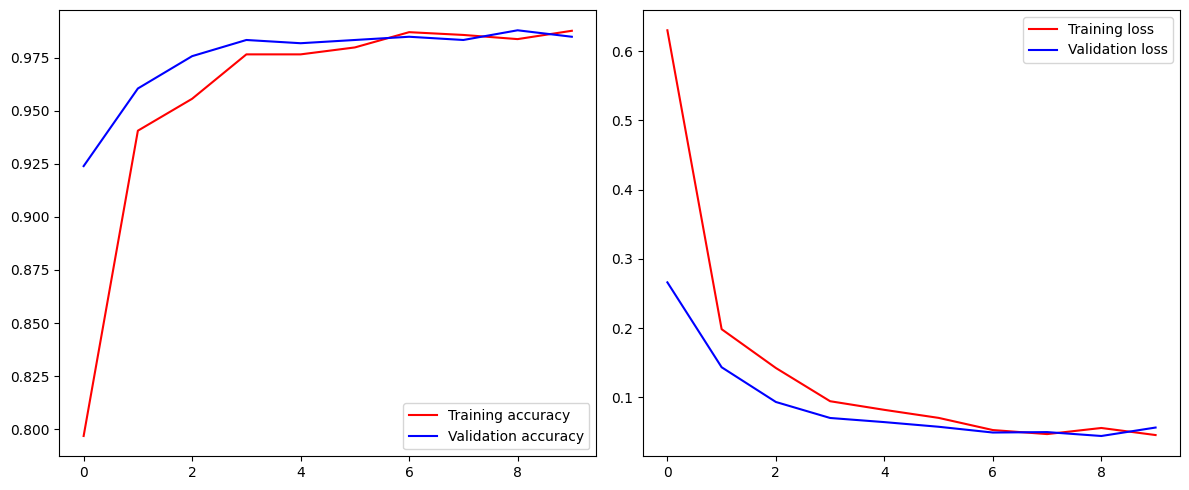

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Defining dependent variables for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Defining independent variable for plotting
epochs = range(len(acc))
# Creating grid of subplots
fit, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.axes_style('whitegrid')
# Plotting accuracy
sns.lineplot(x=epochs,
             y=acc,
             color='r',
             label='Training accuracy',
             ax=axes[0])
sns.lineplot(x=epochs,
             y=val_acc,
             color = 'b',
             label='Validation accuracy',
             ax=axes[0])
# Plotting loss
sns.lineplot(x=epochs,
             y=loss,
             color='r',
             label='Training loss',
             ax=axes[1])
sns.lineplot(x=epochs,
             y=val_loss,
             color = 'b',
             label='Validation loss',
             ax=axes[1])
plt.tight_layout()
plt.show();

In [25]:
model.save("/kaggle/working/Modeltrained.h5")


## Scoring and Evaluation

In [26]:
accuracy_score = model.evaluate(test_gen)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 
 
print("Loss: ",accuracy_score[0])

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - acc: 0.9744 - loss: 0.0876
[0.056506942957639694, 0.9847792983055115]
Accuracy: 98.4779%
Loss:  0.056506942957639694


## Model Prediction¶

In [27]:
from tensorflow.keras.models import load_model
trained_model = load_model("/kaggle/working/Modeltrained.h5")

In [28]:
accuracy_score = trained_model.evaluate(test_gen)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 
 
print("Loss: ",accuracy_score[0])

 3/11 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - acc: 0.9592 - loss: 0.1338

W0000 00:00:1711989670.522766      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 431ms/step - acc: 0.9744 - loss: 0.0876
[0.056506942957639694, 0.9847792983055115]
Accuracy: 98.4779%
Loss:  0.056506942957639694


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted image is rock


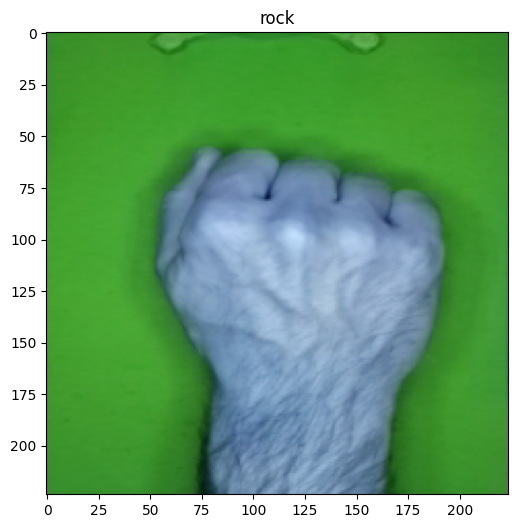

In [29]:
## Check or input image here to test
test_img_path ="/kaggle/input/rock-paper-scizer/rock_paper_scizer/test/rock/02vG75hQW9Vp4oTl.png"

## Basic preprocessing
img = tf.keras.preprocessing.image.load_img(test_img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (224, 224))
img = tf.reshape(img, (-1, 224, 224, 3))
prediction = model.predict(img/255)
predict = classes[np.argmax(prediction)]
print("Predicted image is",predict )

## for image viewing
img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (224, 224)).reshape(1, 224, 224, 3)/255
plt.figure(figsize=(6,6))
plt.title(f"{predict}")
plt.imshow(resized_img[0]);

## Confusion Matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 602ms/step


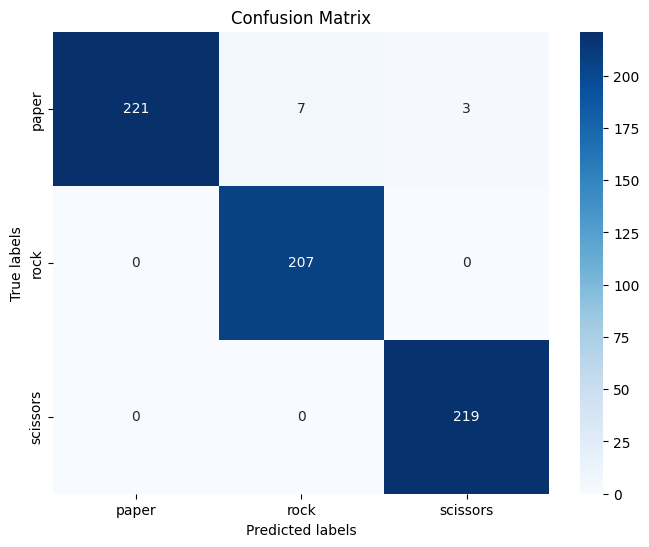

In [30]:
## Confusion Maxtrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions and actual labels from the test data
y_pred = trained_model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(classes[y_pred_classes],y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()